In [10]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score



In [11]:
# Load the dataset
df = pd.read_csv('car_data.csv')

# Display first few rows
print(df.head())
print(df.describe())
print(df.info())



                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   

In [12]:
# Data cleaning and preprocessing
# Check for missing values
print("\n Checking for missing values:\n")
print(df.isnull().sum())
df.dropna(inplace=True)

# Convert 'year' to vehicle age
df['car_age'] = 2025 - df['year']




 Checking for missing values:

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [13]:
# Encoding categorical variables
le_fuel = LabelEncoder()
le_seller = LabelEncoder()
le_transmission = LabelEncoder()



In [15]:
df['fuel'] = le_fuel.fit_transform(df['fuel'])
print(df['fuel'])
df['seller_type'] = le_seller.fit_transform(df['seller_type'])
df['transmission'] = le_transmission.fit_transform(df['transmission'])



0       4
1       4
2       1
3       4
4       1
       ..
4335    1
4336    1
4337    4
4338    1
4339    4
Name: fuel, Length: 4340, dtype: int64


In [6]:
# Selecting relevant features
X = df[['car_age', 'km_driven', 'fuel', 'seller_type', 'transmission']]
y = df['selling_price']



In [9]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [11]:
# Predictions
y_pred = model.predict(X_test)



In [12]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



Mean Squared Error: 185680440881.24243
R² Score: 0.39155137525481265


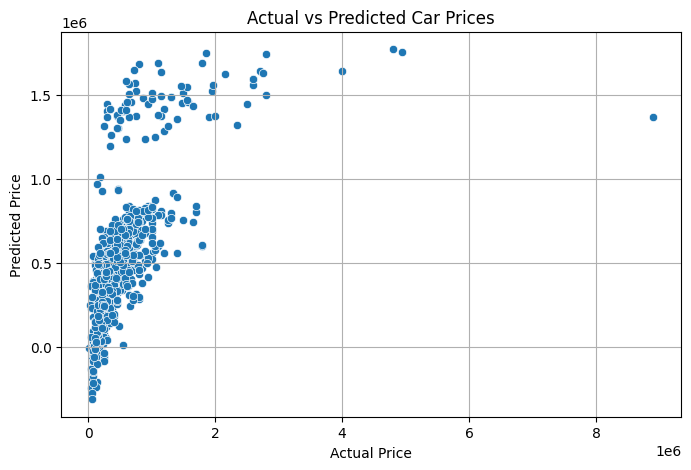

In [13]:
# Plotting Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid()
plt.show()
